In [1]:
import pyproj
import pooch
import pandas as pd
import numpy as np
import xarray as xr
import verde as vd
import boule as bl
import harmonica as hm
import matplotlib.pyplot as plt

In [2]:
# Importar dados
# Dados do projeto Cachoiera do Curuá
data = pd.read_csv('1134_MagLine.XYZ', skiprows=[1], sep = '\s+')

C:\Users\agrog\AppData\Local\Temp\ipykernel_1736\1271763386.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('1134_MagLine.XYZ', skiprows=[1], sep = '\s+')


In [3]:
#Apresentação dos dados
data

,X,Y,FIDUCIAL,GPSALT,BARO,ALTURA,MDT,MAGBASE,MAGBRU,MAGCOM,MAGCOR,MAGNIV,MAGMIC,MAGIGRF,IGRF,LONGITUDE,LATITUDE,DATA,HORA
0,554648,9059335,1062.0,525.00,506.25,107.07,417.93,24188.441,24574.597,24566.675,24580.855,24579.587,24576.724,31.022,24545.702,-56.503472,-8.509550,2015/07/18,17:55:34.0
1,554648,9059342,1062.1,525.09,506.25,107.32,417.77,24188.441,24574.861,24566.902,24581.025,24579.757,24576.894,31.175,24545.719,-56.503471,-8.509482,2015/07/18,17:55:34.1
2,554648,9059350,1062.2,525.17,506.25,106.10,419.07,24188.442,24575.103,24567.109,24581.182,24579.914,24577.051,31.316,24545.735,-56.503471,-8.509414,2015/07/18,17:55:34.2
3,554648,9059357,1062.3,525.26,506.25,107.37,417.89,24188.442,24575.324,24567.296,24581.330,24580.062,24577.200,31.448,24545.752,-56.503470,-8.509347,2015/07/18,17:55:34.3
4,554648,9059365,1062.4,525.34,506.25,103.70,421.64,24188.442,24575.528,24567.466,24581.469,24580.201,24577.339,31.571,24545.768,-56.503470,-8.509279,2015/07/18,17:55:34.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315983,696143,9103761,12313.3,396.66,378.45,90.98,305.68,24210.686,24677.192,24680.606,24671.611,24680.065,24679.639,48.878,24630.761,-55.219930,-8.104132,2016/07/02,14:38:13.3
5315984,696143,9103754,12313.4,396.82,378.53,91.16,305.66,24210.686,24677.050,24680.448,24671.619,24680.071,24679.661,48.915,24630.746,-55.219929,-8.104194,2016/07/02,14:38:13.4
5315985,696143,9103747,12313.5,396.98,378.59,88.63,308.35,24210.686,24676.958,24680.345,24671.682,24680.133,24679.740,49.009,24630.731,-55.219928,-8.104255,2016/07/02,14:38:13.5
5315986,696143,9103740,12313.6,397.14,378.65,89.15,307.99,24210.686,24676.917,24680.297,24671.804,24680.252,24679.878,49.162,24630.716,-55.219926,-8.104316,2016/07/02,14:38:13.6


In [4]:
# Coordenadas dos levantamentos
long_all = data.LONGITUDE
lat_all = data.LATITUDE
# Anomalia de Campo Total
act_all = data.MAGIGRF

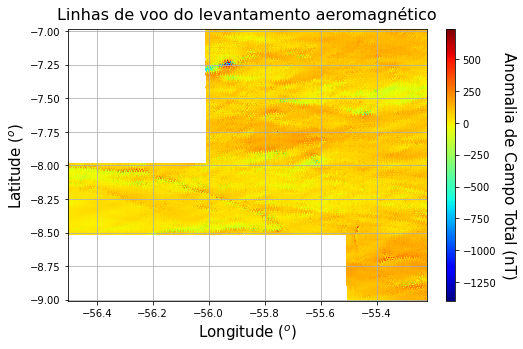

In [17]:
figure1 = plt.figure(figsize=(7,5))

p1 = plt.scatter(long_all, lat_all, s = 1., c = act_all, marker = '.', cmap = plt.cm.jet)
cbar1 = plt.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Anomalia de Campo Total (nT)',fontsize = 15, rotation = -90, labelpad = 20)

plt.title('Linhas de voo do levantamento aeromagnético',fontsize = 16, pad = 10)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
plt.xlim(long_all.min(), long_all.max())
plt.ylim(lat_all.min(), lat_all.max())

# plt.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
# plt.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
plt.grid()
plt.show()

In [13]:
# Slice a smaller portion of the survey data to speed-up calculations for this
# example
region = [-55.6, -55.5,-6.6, -6.7]
# Obtenha uma matriz com as coordenadas do conjunto de dados
# que estão dentro da região de corte: 
inside = vd.inside((data.LONGITUDE, data.LATITUDE), region)

# Obtenha um conjunto de dados menor e substitua-o no original:
data = data[inside]
print("Number of data points:", data.shape[0])
print("Mean height of observations:", data.ALTURA.mean())

ValueError: Invalid region '[-55.6, -55.5, -6.6, -6.7]' (W, E, S, N). Must have S =< N.

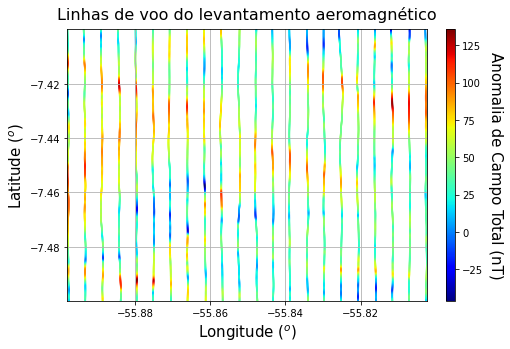

In [23]:
figure1 = plt.figure(figsize=(7,5))

p1 = plt.scatter(long_all, lat_all, s = 1., c = act_all, marker = '.', cmap = plt.cm.jet)
cbar1 = plt.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Anomalia de Campo Total (nT)',fontsize = 15, rotation = -90, labelpad = 20)

plt.title('Linhas de voo do levantamento aeromagnético',fontsize = 16, pad = 10)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
plt.xlim(long_all.min(), long_all.max())
plt.ylim(lat_all.min(), lat_all.max())

# plt.savefig('figure01-flight-lines.png', dpi = 300, transparence = True, bbox_inches = 'tight')
# plt.savefig('figure01-flight-lines.pdf', dpi = 300, transparence = True, bbox_inches = 'tight')
plt.grid()
plt.show()

In [24]:
projection = pyproj.Proj(proj="merc", lat_ts=data.LATITUDE.values.mean())
easting, northing = projection(data.LONGITUDE.values, data.LATITUDE.values)

In [25]:
equivalent_sources = hm.EquivalentSources(depth=10e3, damping=10)
equivalent_sources

EquivalentSources(damping=10, depth=10000.0)

In [26]:
coordinates = (easting, northing, data.ALTURA)
equivalent_sources.fit(coordinates, data.MAGIGRF)